<a href="https://colab.research.google.com/github/Pendragon21/Projetos-Python---IA-Machine-Learning--PLN/blob/main/Carteiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Carteiro Virtual - Reconhecimento de números escritos a mão usando o mninst**
 - A ideia é construir um algoritmo que classifique imagens em escala de cinza de letras de números escritos a mão de tal forma que depois a gente possa desenvolver um programa que lê um digito que uma pessoa escreveu e o programa tem que dizer qual o número que ela escreveu.
 - O Mnist é um conjunto de dados de imagens, um clássico na comunidade de aprendizagem de máquinas, montado pelo Instituto Nacional de Padrões e Tecnologia (o NIST em MNIST) na década de 1980.

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np ## blib de processamento de grandes, multi-dimensionais arranjos e matrizes

In [ ]:
##carregando os modelos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
#exibindo as imagens
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

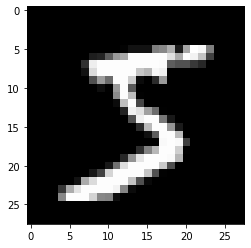

5


In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(train_images[0], cmap='gray')##selecionando a imagem do dataset
plt.show()

print(train_labels[0])

In [ ]:
train_images.shape##tamanho da imagem

(60000, 28, 28)

In [ ]:
np.unique(train_labels)##encontra elementos únicos do array, e os retorna de forma aleatória

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
test_images.shape ##tamanho das imagens de teste

(10000, 28, 28)

In [ ]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**Flatenning**<br>
achatamento das imagens

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

**Normalizando**

In [ ]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

**Categorizando One Hot Encoder**

In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


**Importando Tensorflow e keras**

In [ ]:
from tensorflow.keras import models, layers

**Criando a rede neural**

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512, activation='tanh', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))##fuhção exponencial normalizada

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**Criando compilador keras**

In [ ]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

**Treinando a Rede Neural**

In [ ]:
model.fit(train_images, train_labels, epochs=100, batch_size=128)

Epoch 1/100
469/469 [==============================] - 5s 10ms/step - loss: 0.3374 - accuracy: 0.9007
Epoch 2/100
469/469 [==============================] - 5s 10ms/step - loss: 0.1756 - accuracy: 0.9491
Epoch 3/100
469/469 [==============================] - 5s 10ms/step - loss: 0.1165 - accuracy: 0.9660
Epoch 4/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0851 - accuracy: 0.9747
Epoch 5/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0656 - accuracy: 0.9804
Epoch 6/100
469/469 [==============================] - 4s 10ms/step - loss: 0.0516 - accuracy: 0.9845
Epoch 7/100
469/469 [==============================] - 4s 10ms/step - loss: 0.0399 - accuracy: 0.9880
Epoch 8/100
469/469 [==============================] - 4s 10ms/step - loss: 0.0322 - accuracy: 0.9904
Epoch 9/100
469/469 [==============================] - 4s 10ms/step - loss: 0.0254 - accuracy: 0.9928
Epoch 10/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0201

**VERIFICANDO A ACURÁCIA DA REDE**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.1293 - accuracy: 0.9835
test_acc: 0.9835000038146973


**Salvando o modelo**

In [ ]:
model.save("Carteiro.h5")